# データ解析特論 2022年度水曜２限

# 第10回 その1 ハードマージンSVMで線形分離

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## データ

サイズ $N$ の平面データ $(x_n^{(1)}, \ x_n^{(2)})$ を乱数で生成し，そのラベルを
- ラベル $y_n \in \{1, \ -1\}$
    - $x_1 < x_2$ だとラベル 1
    - $x_1 > x_2$ だとラベル -1
として作る．

まずは線形分離できるデータに対してハードマージンSVMを試そう．

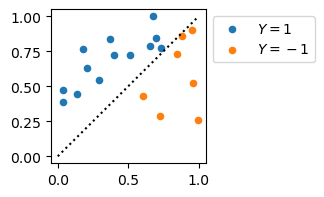

In [8]:
# サンプルサイズ
N = 20

# seed
np.random.seed(seed=2222)

# X
X = np.random.rand(N, 2)

# x_1 > x_2 ならラベルは -1
Y = np.ones(N)
Y[X[:, 0]>X[:, 1]] = -1

# scatter plot
fig, ax = plt.subplots(figsize=(2, 2))
ax.scatter(X[:, 0][Y== 1], X[:, 1][Y== 1], s=20, c='tab:blue', label=r'$Y= 1$')
ax.scatter(X[:, 0][Y==-1], X[:, 1][Y==-1], s=20, c='tab:orange', label=r'$Y=-1$')
ax.plot([0, 1], [0, 1], 'k:')
ax.legend(bbox_to_anchor=(1, 1))

## ハードマージンSVM

分離直線を $a^{(0)} + \mathbf x \mathbf A = 0$ とする．

拘束条件
$$
g_n(\mathbf A, \ a^{(0)}) 
= 1 - y_{n} \left(a^{(0)} + \mathbf x_{n} \mathbf A \right) \le 0
\quad (n = 1, \ 2, \ \ldots, \ N)
$$
の下で
$$
f(\mathbf A, \ a^{(0)}) = \frac12\|\mathbf A\|^2
$$
最大化する問題を考える．

## KKT条件

KKT条件から
$$
\Phi(\mathbf A, a^{(0)}, \boldsymbol\lambda)
= f(\mathbf A, a^{(0)})
+ \sum_{n=1}^N \lambda_n \, g_n (\mathbf A, a^{(0)})
$$
の停留点を求める問題に帰着される．すなわち，
$$
\begin{cases}
\displaystyle
-\nabla f(\mathbf A, a^{(0)})
= \sum_{n=1}^N \lambda_n \nabla g_n(\mathbf A, a^{(0)})
\\
\lambda_n \ge 0, \quad
\lambda_n \, g_n(\mathbf A, a^{(0)}) = 0 
\quad (n=1, \ 2, \ \ldots, \ N)
\end{cases}
$$
を解く．

## 双対問題

KKT条件から
$$
\mathbf A = \sum_{n=1}^N \lambda_n \, y_{n} \, \mathbf x_n^{\mathrm T}
=: \mathbf A_{\boldsymbol\lambda}
$$
と $\mathbf A$ を $\boldsymbol\lambda$ によって表すことができる．これを $\Phi$ に代入すると
$$
\Psi(\boldsymbol\lambda) := \Phi(\mathbf A_{\boldsymbol\lambda}, \ a^{(0)}, \ \boldsymbol\lambda)
= -\frac12 \sum_{n=1}^N \sum_{n'=1}^N \lambda_n \, \lambda_{n'} \, y_{n} \, y_{n'} \, \mathbf x_n \, \mathbf x_{n'}^{\mathrm T} 
+ \sum_{n=1}^N \lambda_n 
$$
を得る．この $\Psi(\boldsymbol\lambda)$ の最大点を
$$
\lambda_n \ge 0 \quad (n=1, \ 2, \ \ldots, \ N), \quad
\sum_{n=1}^N \lambda_n \, y_n= 0
$$
の範囲で解く．

## 解法

双対問題は $-\Psi(\lambda)$ が凸なので，勾配降下法で解くことができる．

1. $\boldsymbol\lambda \leftarrow \boldsymbol\lambda + \eta\nabla\Psi$ によって $\boldsymbol\lambda$ を更新する．
1. $\sum_{n=1}^N \lambda_n \, y_n= 0$ となるように，$\lambda_{n} > 0$ なる $n$ を選んで修正する．
1. この $\boldsymbol\lambda$ に対して，$\lambda_n < 0$ となっていたら $\lambda_n =0$ と置き直す．
1. 収束するまで 1 に戻って繰り返す．

## 勾配

この勾配は
$$
\begin{align}
&
\frac{\partial \Psi}{\partial \lambda_k} 
= \frac{\partial}{\partial \lambda_k} \left( -\frac12 \sum_{n=1}^N \sum_{n'=1}^N \lambda_n \lambda_{n'} y_n y_{n'} \mathbf x_n^{\mathrm T} \mathbf x_{n'} + \sum_{n=1}^N \lambda_n \right)
= -\frac12 \sum_{n=1}^N \sum_{n'=1}^N ( \delta_{kn} \lambda_{n'} + \lambda_n \delta_{kn'}) y_n y_{n'} \mathbf x_n^{\mathrm T} \mathbf x_{n'} + 1
\\
&
\phantom{\frac{\partial \Psi}{\partial \lambda_k} }
= -\frac12 \sum_{n'=1}^N \lambda_{n'} y_k y_{n'} \mathbf x_k^{\mathrm T} \mathbf x_{n'}
-\frac12 \sum_{n=1}^N \lambda_{n} y_{n} y_{k} \mathbf x_n^{\mathrm T} \mathbf x_{k}
+ 1
= -\sum_{n=1}^N \lambda_{n} y_{n} y_{k} \mathbf x_n^{\mathrm T} \mathbf x_{k}
+ 1
\end{align}
$$
なので，行列 $\mathbf B = (B_{ij})$
$$
B_{ij} = y_{n} y_{k} \mathbf x_n^{\mathrm T} \mathbf x_{k}
$$
と定めておくと，
$$
\nabla\Psi = 1 - \mathbf B \boldsymbol\lambda
$$
と表すことができる．
よって，勾配降下法では
$$
\boldsymbol\lambda^{(i+1)} \ \leftarrow \ \boldsymbol\lambda^{(i)} + \eta \nabla\Psi
$$
の反復で計算する．ただし $\eta>0$ は学習率．

適当な反復の収束判定の閾値 tol を用いて，
$$
\|\boldsymbol\lambda^{(i+1)}-\boldsymbol\lambda^{(i)} \| < \mbox{tol}
$$
となったら反復を停止する．

## 計算

In [12]:
%%time
# lambda の初期値
lamb = np.ones(N)

# lambda_n * y_n の総和が 0 になるように修正
lamb -= np.dot(lamb, Y)*Y/np.sum(Y**2)

# 確認
print(np.sum(Y*lamb))

# learning rate
eta = 0.01

# 勾配降下法 (Gradient Descent) の最大反復回数
max_iter = 100000

# lamb の収束判定の閾値
tol = 1e-6

# matrix B
B = np.zeros((N, N))
for k in range(N):
    for n in range(N):
        B[k, n] += Y[n]*Y[k]*np.dot(X[n], X[k])

### 勾配降下法 ###
for i_iter in range(max_iter):
    # 前のステップの lambda を格納
    lamb_prev = np.copy(lamb)
    
    # Psi の勾配
    grad_Psi = 1.0 - B@lamb
    
    # 勾配降下法で lambda を更新
    lamb += eta*grad_Psi
    
    # sum(lamb1*Y) = 0 なるように修正
    lamb[lamb>0] = lamb[lamb>0] - np.dot(lamb[lamb>0], Y[lamb>0])*Y[lamb>0]/np.sum(Y[lamb>0]**2)
    lamb[lamb<0] = 0.0
    
    # lamb の収束判定
    if np.max(np.abs(lamb-lamb_prev)) < tol:
        print(i_iter)
        break
    
print(lamb)
print(np.max(np.abs(lamb-lamb_prev)))

-8.881784197001252e-16
[  0.           0.           0.         218.35046647   0.
   0.           0.           0.           0.           0.
   0.           0.          94.01101549   0.           0.
   0.         312.47553761   0.           0.           0.        ]
0.00030434011461011323
CPU times: user 3.93 s, sys: 95.1 ms, total: 4.03 s
Wall time: 3.97 s


## 結果の可視化

[-20.78440564  13.30929963]
-5.849288504567831
-5.8618094335707225
-5.901190186090144
-5.870762708076232


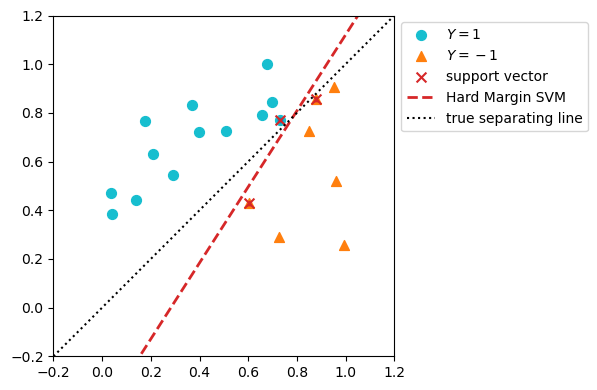

[[ 7  0]
 [ 0 13]]


In [14]:
# 方程式のパラメータ
A = (lamb*Y.reshape(1, -1)@X)[0]
print(A)

# 方程式の定数項はサポートベクトルでの平均で取る
C = 0.0
for i in range(X[lamb>0].shape[0]):
    print(np.dot(A, X[lamb>0][i]) - Y[lamb>0][i])
    C += np.dot(A, X[lamb>0][i]) - Y[lamb>0][i]

C /= X[lamb>0].shape[0]
print(C)

# scatter plot with determining line
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X[:, 0][Y>0], X[:, 1][Y>0], marker='o', s=50, c='tab:cyan', label=r'$Y=1$')
ax.scatter(X[:, 0][Y<0], X[:, 1][Y<0], marker='^', s=50, c='tab:orange', label=r'$Y=-1$')
ax.scatter(X[:, 0][lamb>0][Y[lamb>0]>0], X[:, 1][lamb>0][Y[lamb>0]>0], s=10, c='tab:blue', marker='o', zorder=2)
ax.scatter(X[:, 0][lamb>0][Y[lamb>0]<0], X[:, 1][lamb>0][Y[lamb>0]<0], s=10, c='tab:red', marker='^', zorder=2)
ax.scatter(X[:, 0][lamb>0], X[:, 1][lamb>0], s=50, c='tab:red', marker='x', zorder=2, label='support vector')

# A0*X0 + A1*X1 = C <=> X1 = -A0/A1*X0 + C/A1
ax.plot([-0.2, 1.2], [C/A[1]-A[0]/A[1]*-0.2, C/A[1]-A[0]/A[1]*1.2], '--', lw=2, c='tab:red', label='Hard Margin SVM')
ax.plot([-0.2, 1.2], [-0.2, 1.2], ':k', label='true separating line')

ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect(1)
fig.tight_layout()
plt.show()

# きちんと判定できているか確認
Ypred = np.ones(N)
Ypred[X@A<C] = -1
print(confusion_matrix(Y, Ypred))

## ソフトマージンSVM

KKT条件から双対問題を導くと，ハードマージンSVMの時と同じ関数を扱うことになる．
$$
\Psi(\boldsymbol\lambda) 
= -\frac12 \sum_{n=1}^N \sum_{n'=1}^N \lambda_n \, \lambda_{n'} \, y_{n} \, y_{n'} \, \mathbf x_n \, \mathbf x_{n'}^{\mathrm T} 
+ \sum_{n=1}^N \lambda_n 
$$
を得る．ただし，$\Psi(\boldsymbol\lambda)$ の最大点を求める範囲は
$$
0 \le \lambda_n \le \gamma \quad (n=1, \ 2, \ \ldots, \ N), \quad
\sum_{n=1}^N \lambda_n \, y_n= 0
$$
と制限する．

## 解法

ハードマージンの時と基本は同じ．3 だけ

3. この $\boldsymbol\lambda$ に対して，
    - $\lambda_n < 0$ となっていたら $\lambda_n =0$  と置き直す．
    - $\lambda_n > \gamma$ となっていたら $\lambda_n =\gamma$  と置き直す．

に変更する．

## データ

In [ ]:
# データサイズ


# seed


# X


# x_1 > x_2 ならラベルは -1


# データをずらす


# scatter plot



## 計算

In [ ]:
%%time
# gamma


# lambda の初期値


# lambda_n * y_n の総和が 0 になるように修正


# 確認


# learning rate


# 勾配降下法 (Gradient Descent) の最大反復回数


# lamb の収束判定の閾値


# matrix B



for i_iter in range(max_iter):
    # 前のステップの lambda を格納

    
    # Psi の勾配

    
    # 勾配降下法で lambda を更新

    
    # sum(lamb1*Y) = 0 なるように修正

    
    
    # lamb の収束判定

    
    

## 結果の可視化

In [ ]:
# 方程式のパラメータ


# 方程式の定数項はサポートベクトルでの平均で取る



# scatter plot with determining line




# きちんと判定できているか確認




## 課題10-1

`sklearn` に入っている iris データセットを用いて，`setosa` と `versicolor` に対してハードマージンSVMを実行せよ．

X としては `sepal length (cm)`, `sepal width (cm)` の2変数を用いること．

`setosa` は `iris.target` のラベル 0, `versicolor` はラベル 1 として格納されているので，ラベルが $\pm1$ となるようにラベルを付け替えること．


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target
print(iris.feature_names)
print(iris.target_names)

plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], label='%s'%iris.target_names[0])
plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], label='%s'%iris.target_names[1])
plt.xlabel('%s'%iris.feature_names[0])
plt.ylabel('%s'%iris.feature_names[1])
plt.legend()

# X と Y を SVM が使えるように修正すること

## 以上